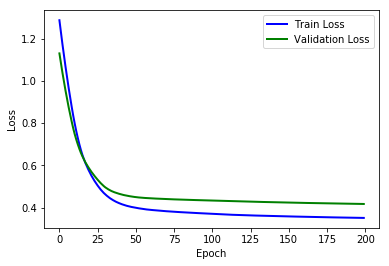

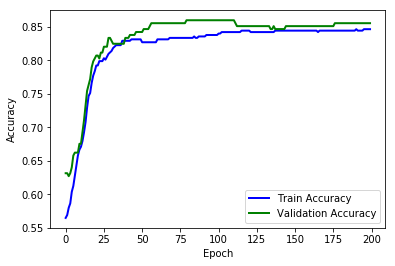

In [4]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

if __name__ == '__main__':
    # step1: Load the experiment data
    t_X,t_y = load_svmlight_file("F:/PythonExs/lab_one/australian_scale")

    # step2: Divide dataset
    X_train, X_valid, y_train, y_valid  = train_test_split(t_X,t_y,test_size=0.33,random_state=42)
    X_train = np.array(X_train.toarray())
    X_valid = np.array(X_valid.toarray())
    y_train = np.array(y_train).reshape(462,1)
    y_valid = np.array(y_valid).reshape(228,1)
    # step3: Initialize parameters
    np.random.seed(42)
    w = np.array(np.random.randn(14,1))
    b = np.random.randn(1)
    C = 1
    eta = 0.06
    train_loss = []
    valid_loss = []
    train_acc = []
    valid_acc = []
    # step4: Intera2ion
    for i in range(200):
        # Train loss
        # hinge_loss = np.maximum(0,1-np.dot(np.dot(X_train,w.T),y_train))
        hinge_loss_t = 1-y_train*(X_train.dot(w)+b)
        hinge_loss_t = np.maximum(0,np.sum(hinge_loss_t,axis=1))
        t_loss = 0.5 * np.square(w).sum() + C * hinge_loss_t.sum()
        train_loss.append(t_loss/len(X_train))
        # Validation loss
        hinge_loss_v = 1-y_valid*(X_valid.dot(w)+b)
        hinge_loss_v = np.maximum(0,hinge_loss_v)
        v_loss = 0.5 * np.square(w).sum() + C * hinge_loss_v.sum()
        valid_loss.append(v_loss/len(X_valid))
        # Compute Gradient
        y_i = y_train.copy()
        y_i[hinge_loss_t==0]=0
        g_w = y_i*X_train
        g_w = np.sum(g_w,axis=0).reshape(14,1)
        D_w = w - C * g_w
        D_b = -C * y_i.sum()
        G_w = -D_w/len(X_train)
        G_b = -D_b/len(X_train)
        w += eta * G_w
        b += eta * G_b
        y = np.dot(X_train,w)+b
        count = 0
        for m in range(len(X_train)):
            if y[m]*y_train[m][0]>0:
                count +=1
        train_acc.append(count/462)
        y = np.dot(X_valid,w)+b
        count=0
        for r in range(len(X_valid)):
            if y[r]*y_valid[r][0]>0:
                count +=1
        valid_acc.append(count/228)
    # Plot the graph
    plt.figure(1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(train_loss,'b',linewidth='2',label='Train Loss')
    plt.plot(valid_loss,'g',linewidth='2',label='Validation Loss')
    plt.legend()
    plt.figure(2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(train_acc,'b',linewidth='2',label='Train Accuracy')
    plt.plot(valid_acc,'g',linewidth='2',label='Validation Accuracy')
    plt.legend()
    plt.show()